In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# follows django database settings format, replace with your own settings
DATABASES = {
    'datafinal':{
        'POSTGRES_DBNAME': 'postgres',
        'POSTGRES_USERNAME': 'postgres',
        'POSTGRES_PASSWORD': 'password',
        'POSTGRES_ADDRESS': 'datafinal.c50h51d04cbn.us-east-2.rds.amazonaws.com',
        'POSTGRES_PORT': 5432,
    },
}

# choose the database to use
db = DATABASES['datafinal']

# construct an engine connection string
engine_string =  ('postgresql+psycopg2://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username= db['POSTGRES_USERNAME'],
                      password= db['POSTGRES_PASSWORD'],
                      ipaddress= db['POSTGRES_ADDRESS'],
                      port= db['POSTGRES_PORT'],
                      dbname= db['POSTGRES_DBNAME'])
               )

# create sqlalchemy engine
engine = create_engine(engine_string)

# read a table from database into pandas dataframe, replace "tablename" with your table name
new_train = pd.read_sql_table('train', engine)
new_train.head()

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,60.0,Business travel,Business,912.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,neutral or dissatisfied
1,Male,disloyal Customer,38.0,Business travel,Business,208.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,neutral or dissatisfied
2,Male,Loyal Customer,31.0,Business travel,Business,3147.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,satisfied
3,Male,Loyal Customer,53.0,Business travel,Business,2327.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,neutral or dissatisfied
4,Male,Loyal Customer,30.0,Personal Travel,Eco,650.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,neutral or dissatisfied


In [2]:
# read a table from database into pandas dataframe, replace "tablename" with your table name
new_test = pd.read_sql_table('test', engine)
new_test.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52.0,Business travel,Eco,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,satisfied
1,Female,Loyal Customer,36.0,Business travel,Business,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,satisfied
2,Male,disloyal Customer,20.0,Business travel,Eco,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44.0,Business travel,Business,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,satisfied
4,Female,Loyal Customer,49.0,Business travel,Eco,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,satisfied


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [5]:
# Create features for new train
nw_tr = new_train.drop(columns="satisfaction", axis=1)
X_train = pd.get_dummies(nw_tr)

# Create target
y_train0 = new_train["satisfaction"]

X_train

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,60.0,912.0,2.0,2.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,39.0,23.0,0,1,1,0,1,0,1,0,0
1,38.0,208.0,3.0,3.0,3.0,4.0,5.0,3.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,0.0,0.0,0,1,0,1,1,0,1,0,0
2,31.0,3147.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,0.0,0,1,1,0,1,0,1,0,0
3,53.0,2327.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,3.0,186.0,182.0,0,1,1,0,1,0,1,0,0
4,30.0,650.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,3.0,0.0,0.0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,39.0,3483.0,1.0,1.0,1.0,1.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,0.0,0.0,1,0,1,0,1,0,1,0,0
103590,42.0,3636.0,0.0,5.0,0.0,4.0,2.0,5.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,0.0,0.0,0,1,1,0,1,0,1,0,0
103591,64.0,376.0,1.0,5.0,1.0,1.0,2.0,4.0,5.0,4.0,4.0,1.0,4.0,3.0,4.0,4.0,0.0,0.0,1,0,1,0,0,1,0,1,0
103592,57.0,192.0,5.0,5.0,5.0,1.0,2.0,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,0.0,0.0,1,0,1,0,0,1,0,1,0


In [6]:
# Create features for new test
nw_ts = new_test.drop(columns="satisfaction", axis=1)
X_test = pd.get_dummies(nw_ts)

# Create target
y_test0 = new_test["satisfaction"]

X_test

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52.0,160.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,50.0,44.0,1,0,1,0,1,0,0,1,0
1,36.0,2863.0,1.0,1.0,3.0,1.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,0.0,0.0,1,0,1,0,1,0,1,0,0
2,20.0,192.0,2.0,0.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,3.0,2.0,2.0,2.0,0.0,0.0,0,1,0,1,1,0,0,1,0
3,44.0,3377.0,0.0,0.0,0.0,2.0,3.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,4.0,0.0,6.0,0,1,1,0,1,0,1,0,0
4,49.0,1182.0,2.0,3.0,4.0,3.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,0.0,20.0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,34.0,526.0,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,0,1,0,1,1,0,1,0,0
25889,23.0,646.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,0,1,1,0,1,0,1,0,0
25890,17.0,828.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,1,0,1,0,0,1,0,1,0
25891,14.0,1127.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0,0,1,1,0,1,0,1,0,0


In [7]:
y_train0.describe()

count                      103594
unique                          2
top       neutral or dissatisfied
freq                        58697
Name: satisfaction, dtype: object

In [8]:
y_test0.describe()

count                       25893
unique                          2
top       neutral or dissatisfied
freq                        14528
Name: satisfaction, dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
#Encode text labels into numerical values
le = LabelEncoder()
y_train = le.fit_transform(y_train0)
y_test = le.fit_transform(y_test0)

In [11]:
# Check the balance of target values
#y_encoded.value_counts()
print(y_train)
print(y_test)

[0 0 1 ... 0 1 0]
[1 1 0 ... 0 1 0]


In [12]:
le.classes_

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [13]:
pd.Series(y_train).value_counts()

0    58697
1    44897
dtype: int64

In [14]:
pd.Series(y_test).value_counts()

0    14528
1    11365
dtype: int64

In [15]:
X_train.count()

Age                                  103594
Flight Distance                      103594
Inflight wifi                        103594
Departure/Arrival_time_convenient    103594
Ease_of_Online booking               103594
Gate_location                        103594
Food_and_drink                       103594
Online boarding                      103594
Seat comfort                         103594
Inflight entertainment               103594
On-board service                     103594
Leg room service                     103594
Baggage handling                     103594
Checkin service                      103594
Inflight service                     103594
Cleanliness                          103594
Departure_Delay_in_Minutes           103594
Arrival_Delay_in_Minutes             103594
Gender_Female                        103594
Gender_Male                          103594
Customer_Loyal Customer              103594
Customer_disloyal Customer           103594
Type_of_Travel_Business travel  

In [16]:
X_train.dtypes

Age                                  float64
Flight Distance                      float64
Inflight wifi                        float64
Departure/Arrival_time_convenient    float64
Ease_of_Online booking               float64
Gate_location                        float64
Food_and_drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
Cleanliness                          float64
Departure_Delay_in_Minutes           float64
Arrival_Delay_in_Minutes             float64
Gender_Female                          uint8
Gender_Male                            uint8
Customer_Loyal Customer                uint8
Customer_disloyal Customer             uint8
Type_of_Tr

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Train the data
classifier.fit(X_train, y_train)
#print(y_encoded)
#new_train.dtypes


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Predict outcomes for train data set
predictions = classifier.predict(X_test)
df =pd.DataFrame({"Prediction": predictions, "Actual": y_test})
df


,Prediction,Actual
0,0,1
1,1,1
2,0,0
3,1,1
4,0,1
...,...,...
25888,1,0
25889,1,1
25890,0,0
25891,1,1


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7743019348858765

In [21]:
df["Actual"].value_counts()

0    14528
1    11365
Name: Actual, dtype: int64

In [22]:
# import the confusion_matrix, which is the table of 
# true positives, false positives, true negatives, and false negatives.

from sklearn.metrics import confusion_matrix
c_matrix =confusion_matrix(y_test, predictions)
print(c_matrix)

[[11531  2997]
 [ 2847  8518]]


In [23]:
# Scikitlearn's classification_report calculates the metrics of the model
# Precision = TP/(TP + FP),  recall (sensitivity) TP/(TP + FN)
# F1 = 2(Precision * Sensitivity)/(Precision + Sensitivity)
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     14528
           1       0.74      0.75      0.74     11365

    accuracy                           0.77     25893
   macro avg       0.77      0.77      0.77     25893
weighted avg       0.77      0.77      0.77     25893



LogisticRegression


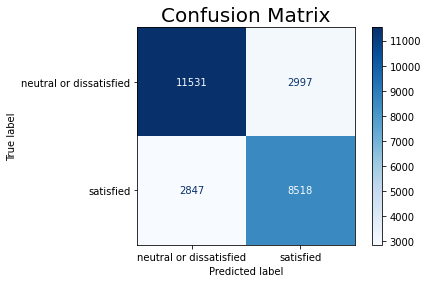

In [24]:
# plot for confusion matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
print("LogisticRegression")
plot_confusion_matrix(classifier, X_test, y_test,cmap="Blues",values_format="d",display_labels=["neutral or dissatisfied", "satisfied"])
plt.title("Confusion Matrix", fontsize=20)
plt.grid(b=False)
plt.show()

NameError: ignored

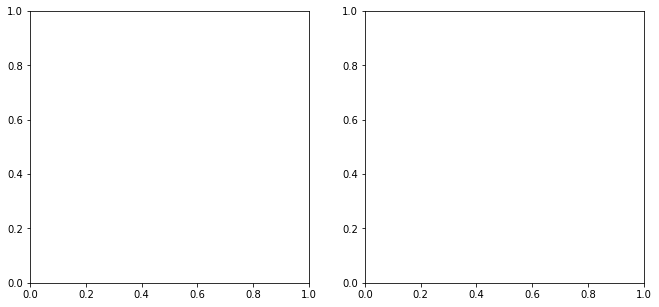

In [26]:
# plot receiver operating characteristic (ROC) curve and detection error tradeoff (DET) curves
# A ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system 
# as its discrimination threshold is varied. 
# The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) 
# at various threshold settings. The true-positive rate is also known as sensitivity, recall.

# A detection error tradeoff (DET) graph is a graphical plot of error rates for binary classification systems, 
# plotting the false rejection rate vs. false acceptance rate

from sklearn import datasets, metrics, model_selection

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(classifier, X_test, y_test, ax=ax_roc)
plot_det_curve(classifier, X_test, y_test, ax=ax_det)

ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

**Ranked Feature Importance**

In [28]:
# Create a random forest classifier.
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [30]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [32]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 1, 0])

In [33]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.02826307, 0.02863505, 0.13676148, 0.01312367, 0.03662509,
       0.0141644 , 0.01016762, 0.159295  , 0.04592484, 0.06153869,
       0.0284209 , 0.02874586, 0.02450001, 0.02380083, 0.02244442,
       0.02502267, 0.01036198, 0.01182543, 0.0030441 , 0.00280487,
       0.02796065, 0.02385005, 0.04533737, 0.06838494, 0.07224469,
       0.04374933, 0.003003  ])

In [35]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)

[(0.15929500431165558, 'Online boarding'),
 (0.13676147985094148, 'Inflight wifi'),
 (0.072244692098048, 'Class_Business'),
 (0.06838494054690096, 'Type_of_Travel_Personal Travel'),
 (0.06153868785641534, 'Inflight entertainment'),
 (0.04592483768303698, 'Seat comfort'),
 (0.04533737186147056, 'Type_of_Travel_Business travel'),
 (0.04374932512448538, 'Class_Eco'),
 (0.03662509158304051, 'Ease_of_Online booking'),
 (0.02874586108900998, 'Leg room service'),
 (0.028635045558397545, 'Flight Distance'),
 (0.02842090231455289, 'On-board service'),
 (0.028263070792051467, 'Age'),
 (0.027960647107687617, 'Customer_Loyal Customer'),
 (0.025022669389360742, 'Cleanliness'),
 (0.024500007712100577, 'Baggage handling'),
 (0.02385004677732012, 'Customer_disloyal Customer'),
 (0.023800829785121175, 'Checkin service'),
 (0.022444421724469334, 'Inflight service'),
 (0.014164403146082003, 'Gate_location'),
 (0.013123672400594607, 'Departure/Arrival_time_convenient'),
 (0.011825427422646573, 'Arrival_De